# Citi Bike Data Analysis and Visualization
**Objective** - To get a clear understanding of how the bike usage has been change since the onset of lockdowns and how it has changed after 9 months into the devastating pandemic.

### Questions answered in this workbook:

##### Note: The three phases here refer to the pre pandemic which is the month of February, During pandemic which is Month of March and the later stage which is month of December.

 - Distribution change from Customers to Subscribers in three phases of this pandemic.
 - Top 10 starting locations during the three phases.
 - Top 10 trips during the three phases.
 - Average Duration of trips from Customers to Subscribers during the three phases.
 - Average Duration of trips by Gender
 - Most popular bikes during the phases.

## Setting up

In [1]:
#Necessary Imports
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Ensure data is formatted correctly to avoid errors in the visuals
def format_conv(df):
    df['starttime'] = pd.to_datetime(df['starttime'],errors="ignore")
    df['stoptime'] = pd.to_datetime(df['stoptime'],errors="ignore")
    df['start station name'] = df['start station name'].astype('category')
    df['end station name'] = df['end station name'].astype('category')
    df['usertype'] = df['usertype'].astype('category')
    df['gender'] = df['gender'].astype('category')
    df = df.drop(df.index[(df['tripduration'] < 90) & (df['start station latitude'] == df['end station latitude'])])
    return df

In [3]:
df_pre = format_conv(pd.read_csv("202002-citibike-tripdata.csv"))
df_during = format_conv(pd.read_csv("202003-citibike-tripdata.csv"))
df_later = format_conv(pd.read_csv("202012-citibike-tripdata.csv"))
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047463 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   tripduration             1047463 non-null  int64   
 1   starttime                1047463 non-null  object  
 2   stoptime                 1047463 non-null  object  
 3   start station id         1047463 non-null  int64   
 4   start station name       1047463 non-null  category
 5   start station latitude   1047463 non-null  float64 
 6   start station longitude  1047463 non-null  float64 
 7   end station id           1047463 non-null  int64   
 8   end station name         1047463 non-null  category
 9   end station latitude     1047463 non-null  float64 
 10  end station longitude    1047463 non-null  float64 
 11  bikeid                   1047463 non-null  int64   
 12  usertype                 1047463 non-null  category
 13  birth year               10

## Distribution change from Customers to Subscribers in three phases of this pandemic

Subscriber in pre pandemic stage: 84741
Customer in pre pandemic stage: 962722


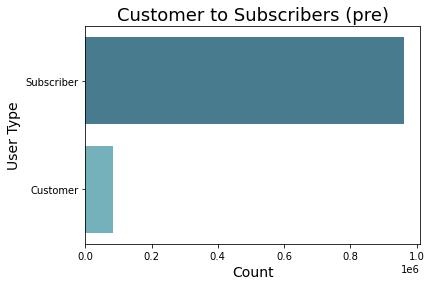

Subscriber in during pandemic stage: 154006
Customer in during pandemic stage: 912821


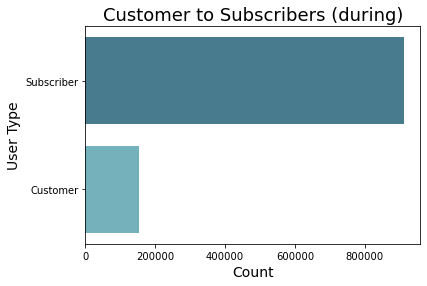

In [4]:
# Trips by subscribers and customers
def sub_to_cust(df, stage):
    """
    Subscriber to Customer plot.
    -Parameters
    df - A pandas Series DataFrame
    stage - a string of the dataset stage passed
    returns a barchart.
    """
    td_user = pd.DataFrame()
    td_user['usertype'] = df['usertype'].value_counts().index
    td_user['count']=df['usertype'].value_counts().values
    td_user['usertype'] = td_user['usertype'].astype('object')
    trips_subs = df["usertype"].value_counts()[0]
    trips_cust = df["usertype"].value_counts()[1]
    print(f"Subscriber in {stage} pandemic stage: {str(trips_subs)}")
    print(f"Customer in {stage} pandemic stage: {str(trips_cust)}")
    
    ax = sns.barplot(x="count",y="usertype",data=td_user,palette="GnBu_d")
    ax.set_title('Customer to Subscribers ('+ stage +')', fontsize = 18)
    ax.set_ylabel("User Type",fontsize=14)
    ax.set_xlabel("Count",fontsize=14)
#     for index,row in td_user.iterrows():
#         ax.text(index,row['count'],str(row['count']),color='white', ha="center", fontsize = 10)
    plt.show()
    del(td_user)
    
    
sub_to_cust(df_pre,"pre")
sub_to_cust(df_during,"during")

#### Subscriber to customer change

In [5]:
#Trips after 9 months into Pandemic
trips_subs_pre = df_pre["usertype"].value_counts()[0]
trips_cust_pre = df_pre["usertype"].value_counts()[1]
trips_subs_during = df_during["usertype"].value_counts()[0]
trips_cust_during = df_during["usertype"].value_counts()[1]
trips_subs_later = df_later["usertype"].value_counts()[0]
trips_cust_later = df_later["usertype"].value_counts()[1]


print(f"Subscribers 9 months in pandemic: {trips_subs_later}")
print(f"Customers 9 months in pandemic: {trips_cust_later}")
print(f"Subscribers lost: {trips_subs_later-trips_subs_pre}")
print(f"Customers gained: {trips_cust_pre-trips_cust_later}")

Subscribers 9 months in pandemic: 167674
Customers 9 months in pandemic: 917372
Subscribers lost: 82933
Customers gained: 45350


#### Percent change

In [6]:
# Percent change 
percent_customer_pand = (abs(trips_cust_pre - trips_cust_during)/((trips_cust_pre+trips_cust_during)/2)*100)
percent_subscriber_pand = (abs(trips_subs_pre - trips_subs_during)/((trips_subs_pre+trips_subs_during)/2)*100)

print(f"Percentage change in customers: {percent_customer_pand:1.3}%")
print(f"Percentage change in Subscribers: {percent_subscriber_pand:1.3}%")

Percentage change in customers: 5.32%
Percentage change in Subscribers: 58.0%


## Top 10 starting locations during the three phases.

- 1 Ave & E 68 St
- W 21 St & 6 Ave
- E 17 St & Broadway
- E 13 St & Avenue A
- Broadway & W 60 St
- Broadway & E 14 St
- E 33 St & 1 Ave
- University Pl & E 14 St
- Grand St & Elizabeth St
- E 27 St & 1 Ave

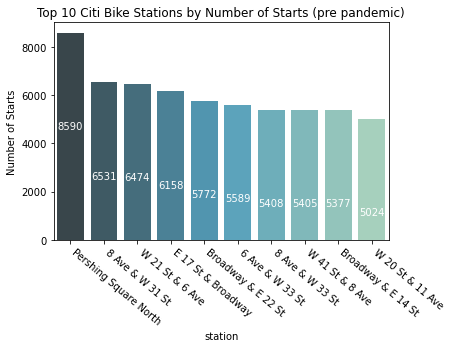

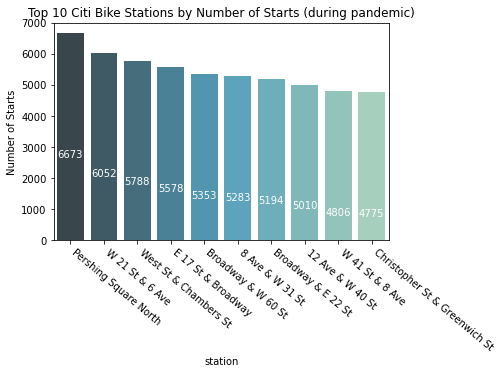

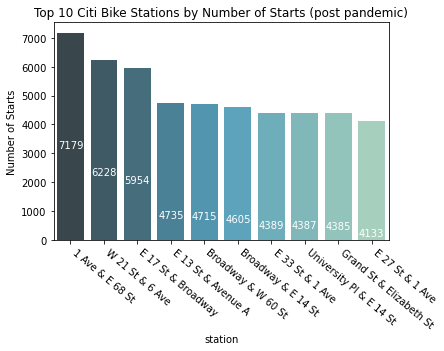

In [7]:
# Top 5 Stations previous to pandemic
def top_10_starts(df,stage):
    """
    Top 10 starting destinations.
    -Parameters
    df - A pandas Series DataFrame.
    stage - a string of the dataset stage passed.
    returns a barchart.
    """
    top10 = pd.DataFrame() 
    top10['station']= df['start station name'].value_counts().head(10).index
    top10['Number of Starts']=df['start station name'].value_counts().head(10).values
    top10['station'] = top10['station'].cat.remove_unused_categories()
    top10['station'] = top10['station'].astype('object')
    top10.to_csv("top10.csv")
    #Plotting
    ax = sns.barplot('station', 'Number of Starts', data = top10, palette="GnBu_d")
    ax.set_title('Top 10 Citi Bike Stations by Number of Starts (' + stage +')', fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=-40, ha = 'left')
    for index, row in top10.iterrows():
        ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
                color='white', ha="center", fontsize = 10)
    plt.show()
    del(top10)
    
top_10_starts(df_pre,'pre pandemic')
top_10_starts(df_during,'during pandemic')
top_10_starts(df_later,'post pandemic')

## Top 10 trips during the three phases.

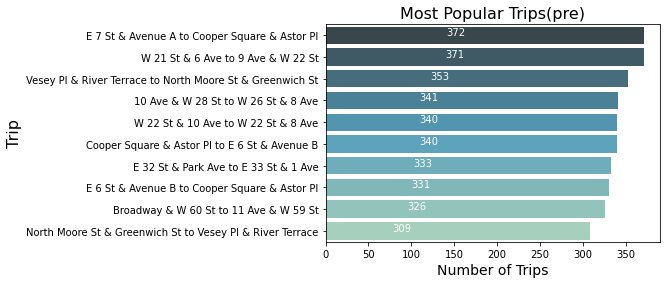

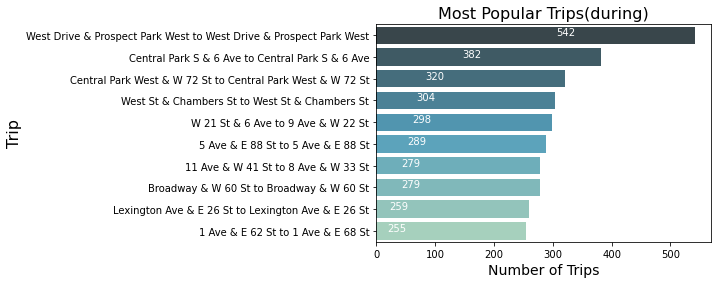

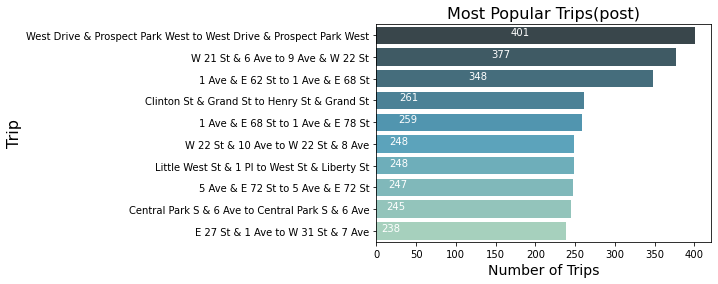

In [8]:
def most_popular(df, stage):
    """
    Most popular trips plot.
    -Parameters
    df - A pandas Series DataFrame
    stage - a string of the dataset stage passed
    returns a barchart.
    """
    trips_df = pd.DataFrame()
    trips_df = df.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
    trips_df = trips_df.sort_values('Number of Trips', ascending = False)
    trips_df["start station name"] = trips_df["start station name"].astype(str)
    trips_df["end station name"] = trips_df["end station name"].astype(str)
    trips_df["Trip"] = trips_df["start station name"] + " to " + trips_df["end station name"]
    trips_df = trips_df[:10]
    trips_df = trips_df.drop(['start station name', "end station name"], axis = 1)
    trips_df = trips_df.reset_index()
    
    #Plotting
    ax4 = sns.barplot('Number of Trips','Trip', data = trips_df,palette="GnBu_d")
    ax4.set_title('Most Popular Trips(' + stage + ')' , fontsize = 16)
    ax4.set_ylabel("Trip",fontsize=16)
    ax4.set_xlabel("Number of Trips",fontsize=14)
    for index, row in trips_df.iterrows():
        ax4.text(row['Number of Trips']-220,index,row['Number of Trips'], 
                 color='white', ha="center",fontsize = 10)
    plt.show()
    del(trips_df)
    
most_popular(df_pre,"pre")
most_popular(df_during,"during")
most_popular(df_later,"post")

## Average Duration of trips from Customers to Subscribers during the three phases.

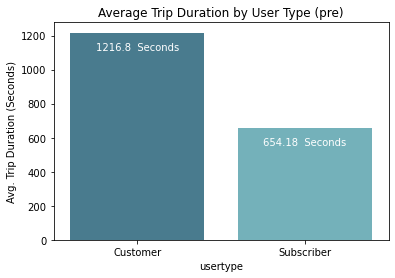

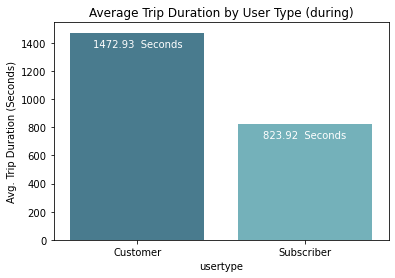

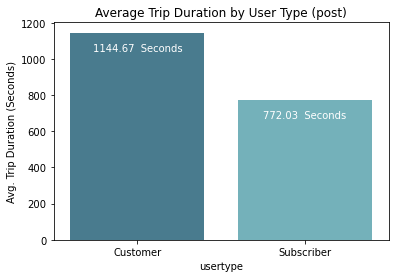

In [9]:
# average trip duration by user type
def trip_user(df, stage):
    """
    Average duration by user type.
    -Parameters
    df - A pandas Series DataFrame
    stage - a string of the dataset stage passed
    returns a barchart.
    """
    #Anomaly removal
    df = df.drop(df.index[(df["tripduration"]>7200)])

    #Usertype usage
    td_user = pd.DataFrame()
    td_user['Avg. Trip Duration'] = round(df.groupby('usertype')['tripduration'].mean(),2)
    td_user = td_user.reset_index()
    td_user['usertype'] = td_user['usertype'].astype('object')
    
    ax = sns.barplot('usertype', 'Avg. Trip Duration', data = td_user,palette="GnBu_d")
    ax.set_title('Average Trip Duration by User Type (' + stage +')')
    ax.set_ylabel('Avg. Trip Duration (Seconds)')
    for index, row in td_user.iterrows():
        ax.text(index,row['Avg. Trip Duration']-100,(str(row['Avg. Trip Duration'])+"  Seconds"), 
                 color='white', ha="center", fontsize = 10)
    plt.show()

trip_user(df_pre,'pre')
trip_user(df_during,'during')
trip_user(df_later,'post')

## Average Duration of trips by Gender

posx and posy should be finite values
posx and posy should be finite values


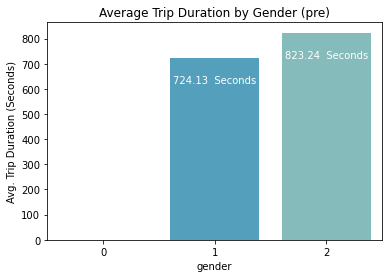

posx and posy should be finite values
posx and posy should be finite values


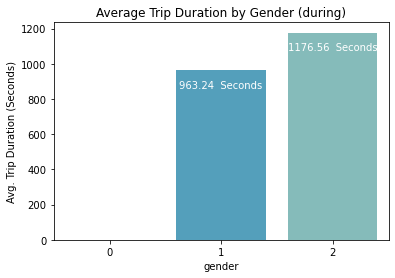

posx and posy should be finite values
posx and posy should be finite values


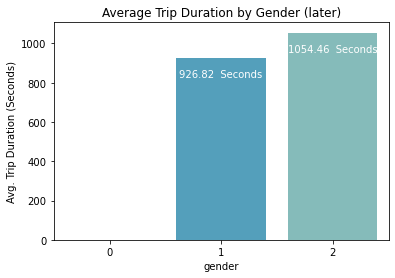

In [10]:
# Gender Breakdown over 3 phases
def trip_gender(df, stage):
    """
    Subscriber to Customer plot.
    -Parameters
    df - A pandas Series DataFrame
    stage - a string of the dataset stage passed
    returns a barchart.
    """
    #Anamoly drop
    df1 = df.drop(df.index[(df['gender']==0)])
    
    #Gender breakdown
    td_user = pd.DataFrame()
    td_user['Avg. Trip Duration'] = round(df1.groupby('gender')['tripduration'].mean(),2)
    td_user = td_user.reset_index()
    td_user['gender'] = td_user['gender'].astype('object')
    
    ax = sns.barplot('gender', 'Avg. Trip Duration', data = td_user,palette="GnBu_d")
    ax.set_title('Average Trip Duration by Gender (' + stage +')')
    ax.set_ylabel('Avg. Trip Duration (Seconds)')
    for index, row in td_user.iterrows():
        ax.text(index,row['Avg. Trip Duration']-100,(str(row['Avg. Trip Duration'])+"  Seconds"), 
                 color='white', ha="center", fontsize = 10)
    plt.show()
    
trip_gender(df_pre,"pre")
trip_gender(df_during,"during")
trip_gender(df_later,"later")

## Most popular bikes during the phases.

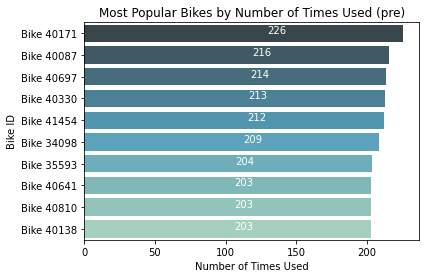

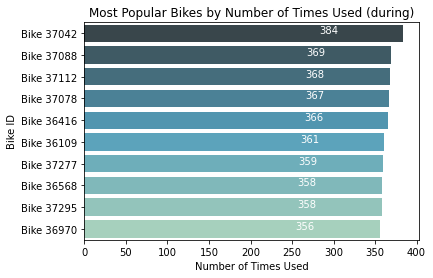

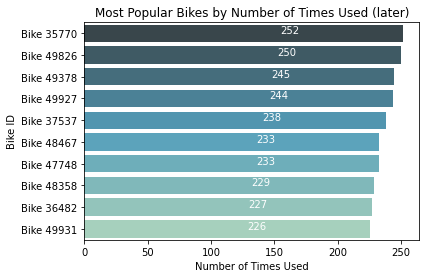

In [11]:
# Busiest Bikes during Lockdown
def busiest_bike(df, stage):
    """
    Busiest bikes plot.
    -Parameters
    df - A pandas Series DataFrame
    stage - a string of the dataset stage passed
    returns a barchart.
    """
    bike_use_df = pd.DataFrame()
    bike_use_df = df.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used')
    bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
    bike_use_df = bike_use_df[:10]
    bike_use_df['Bike ID'] = bike_use_df['bikeid'].astype(str)
    bike_use_df['Bike ID'] = ('Bike ' + bike_use_df['Bike ID'])
    bike_use_df = bike_use_df.reset_index()
    
    ax = sns.barplot('Number of Times Used', 'Bike ID',data = bike_use_df, palette="GnBu_d")
    ax.set_title('Most Popular Bikes by Number of Times Used ('+ stage +')')
    for index, row in bike_use_df.iterrows():
        ax.text(row['Number of Times Used']-90,index,row['Number of Times Used'], color='white', ha="center", fontsize =10)
    plt.show()
    
    
busiest_bike(df_pre, 'pre')
busiest_bike(df_during, 'during')
busiest_bike(df_later, 'later')

### Thank you.